In [2]:
# Re-import libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Define constants
confidence_level = 0.95
margin_of_error = 0.05
alpha = 0.05
power = 0.8

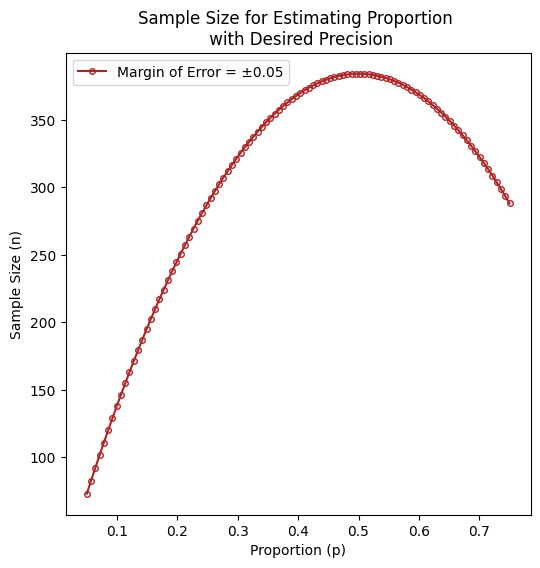

In [8]:
# 1. Estimate sample size for a range of proportions with fixed precision

def estimate_sample_size_for_proportion(p, margin_of_error, confidence_level):
    """Estimate sample size for a proportion given desired precision."""
    z = stats.norm.ppf(1 - (1 - confidence_level) / 2)
    return (z**2 * p * (1 - p)) / (margin_of_error**2)

proportions = np.linspace(0.05, 0.75, 100)  # Range of possible proportions
sample_sizes_precision = [estimate_sample_size_for_proportion(p, margin_of_error, confidence_level) for p in proportions]


fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# Plot 1: Sample size for precision
ax.plot(proportions, sample_sizes_precision, label="Margin of Error = ±0.05",
        marker='o', linestyle='-', markerfacecolor='none', markersize=4, color='firebrick')
ax.set_title("Sample Size for Estimating Proportion \n with Desired Precision")
ax.set_xlabel("Proportion (p)")
ax.set_ylabel("Sample Size (n)")
ax.legend()



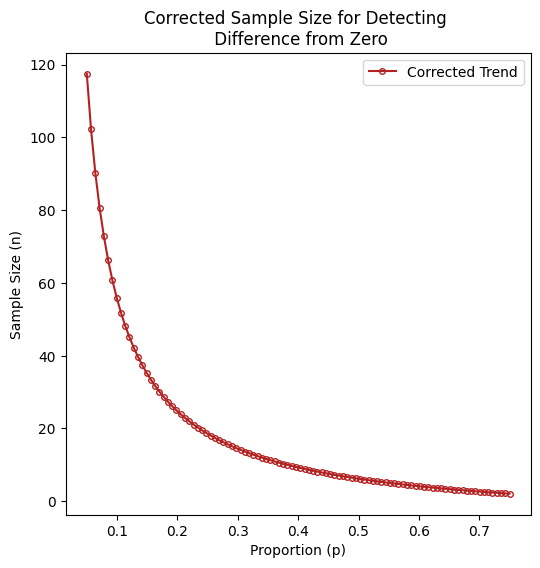

In [9]:
# 2. Test proportion significantly different from zero (corrected)

def corrected_sample_size_to_detect_difference(p, alpha, power):
    """Corrected sample size calculation for testing proportion different from 0."""
    z_alpha = stats.norm.ppf(1 - alpha)
    z_beta = stats.norm.ppf(power)
    delta = p  # Detecting difference from zero implies delta = p
    if p == 0:  # Avoid division by zero
        return np.inf
    return ((z_alpha + z_beta)**2 * (1 - p)) / p

sample_sizes_difference_corrected = [corrected_sample_size_to_detect_difference(p, alpha, power) for p in proportions]

# Plot 2: Sample size for detecting difference from zero (corrected)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(proportions, sample_sizes_difference_corrected, label="Corrected Trend",
        marker='o', linestyle='-', markerfacecolor='none', markersize=4, color='firebrick')
ax.set_title("Corrected Sample Size for Detecting \n Difference from Zero")
ax.set_xlabel("Proportion (p)")
ax.set_ylabel("Sample Size (n)")
ax.legend()


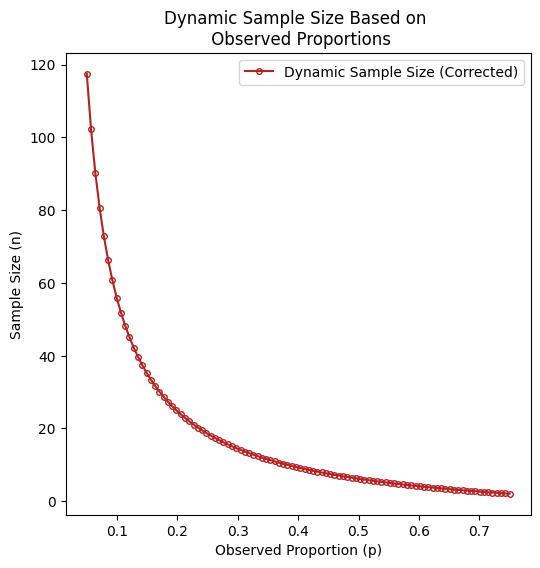

In [11]:

# 3. Dynamic sample size based on observed proportions (corrected)
observed_proportions = np.linspace(0.05, 0.75, 100)  # Example range of observed proportions
dynamic_sample_sizes_corrected = [corrected_sample_size_to_detect_difference(p, alpha, power) for p in observed_proportions]

# Plot 3: Dynamic sample size based on observed proportions (corrected)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(observed_proportions, dynamic_sample_sizes_corrected, label="Dynamic Sample Size (Corrected)",
           marker='o', linestyle='-', markerfacecolor='none', markersize=4, color='firebrick')
ax.set_title("Dynamic Sample Size Based on \n Observed Proportions")
ax.set_xlabel("Observed Proportion (p)")
ax.set_ylabel("Sample Size (n)")
ax.legend()

